In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))

In [5]:
groupDf = df[['user_id', 'Toxicity','qt_flag', 'rt_flag','month']]

In [6]:
groupDf['Toxicity'] = groupDf['Toxicity'] * 10
groupDf['Toxicity'] = (groupDf['Toxicity'].apply(np.ceil)) / 10

In [7]:
monthDf = groupDf[groupDf['month'] == "01"]

In [9]:
monthDf.head()

,user_id,Toxicity,qt_flag,rt_flag,month,category
247,3239623496,0.2,False,False,01,original
248,3239623496,0.1,False,False,01,original
249,3239623496,0.1,False,False,01,original
250,3239623496,0.1,False,False,01,original
251,3239623496,0.3,False,False,01,original


In [10]:
monthDf['category'] = ''

In [11]:
for i, row in monthDf.iterrows():
    if row['qt_flag'] == False and row['rt_flag'] == False:
        monthDf.at[i, 'category'] = 'original'
    elif row['qt_flag'] == False and row['rt_flag'] == True:
        monthDf.at[i, 'category'] = 'retweet'
    elif row['qt_flag'] == True and row['rt_flag'] == False:
        monthDf.at[i, 'category'] = 'quoted'

In [12]:
user_category = monthDf.groupby(['user_id', 'category']).size().reset_index(name='counts')

In [13]:
# Pivoting the data to have each category as a column
user_category = user_category.pivot(index='user_id', columns='category', values='counts').fillna(0)

In [16]:
# Adding the columns to classify the users into 7 different categories
user_category['original'] = user_category['original'].apply(lambda x: x if x==0 else 1)
# user_category['retweet'] = user_category['retweet'].apply(lambda x: x if x==0 else 1)
user_category['quoted'] = user_category['quoted'].apply(lambda x: x if x==0 else 1)
user_category['original_quoted'] = user_category.apply(lambda x: 1 if x['original'] == 1 and x['quoted'] == 1 else 0, axis=1)
# user_category['original_retweet'] = user_category.apply(lambda x: 1 if x['original'] == 1 and x['retweet'] == 1 else 0, axis=1)
# user_category['quoted_retweet'] = user_category.apply(lambda x: 1 if x['quoted'] == 1 and x['retweet'] == 1 else 0, axis=1)
# user_category['original_quoted_retweet'] = user_category.apply(lambda x: 1 if x['original'] == 1 and x['quoted'] == 1 and x['retweet'] == 1 else 0, axis=1)

In [17]:
# Counting the number of users in each category
category_counts = user_category.sum().reset_index()
category_counts.columns = ['category', 'counts']

In [18]:
toxicity = np.arange(0, 1.1, 0.1)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'brown']

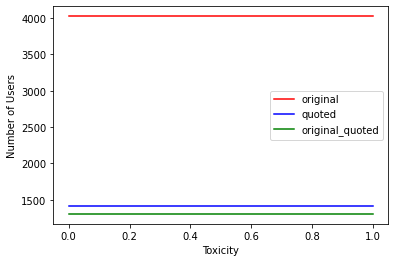

In [20]:
for i, row in category_counts.iterrows():
    plt.plot(toxicity, [row['counts']]*len(toxicity), color=colors[i], label=row['category'])

plt.xlabel('Toxicity')
plt.ylabel('Number of Users')
plt.legend()
plt.show()